# Proyek Analisis Data: Bike Sharing
- Nama: Nathaleon Ranggainaya Dian Kuncoro
- Email: nathaleonrdk@gmail.com
- ID Dicoding: nathaleon



## Pertanyaan Bisnis
- Bagaimana pengaruh cuaca terhadap total jumlah penyewaan sepeda pada level harian?
- Apakah ada pola musiman dalam penyewaan sepeda? Apakah ada bulan-bulan tertentu di mana penggunaan sepeda lebih tinggi?

## Library yang dibutuhkan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

### 1. Gathering Data

Mengumpulkan data dari file CSV untuk kedua sheet day.csv dan hour.csv

In [118]:
day_data = pd.read_csv('data/day.csv')
hour_data = pd.read_csv('data/hour.csv')

Menampilkan 5 baris pertama dari dataset day.csv dan hour.csv

In [119]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [120]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### 2. Assesing Data

#### Memeriksa Info Data
Melihat informasi umum dari dataset untuk mengecek tipe data dan adanya missing values.

In [121]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [122]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### Memeriksa Missing Values
Cek apakah ada nilai yang hilang (missing values) dalam dataset.

In [123]:
day_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [124]:
hour_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Memeriksa Statistik Data
Melihat distribusi statistik dari data numerik.

In [125]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [126]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Cek duplikasi data

In [127]:
print("Duplikasi:", day_data.duplicated().sum())

Duplikasi: 0


In [128]:
print("Duplikasi:", hour_data.duplicated().sum())

Duplikasi: 0


### 3. Cleaning Data
Memperbaiki atau membersihkan masalah data yang ditemukan selama proses assessing

#### Mengubah Tipe Data
Merubah kolom dteday menjadi tipe datatime.

In [129]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

In [130]:
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

Verifikasi Perubahan

In [131]:
day_data.info()
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Menghapus Kolom yang Tidak Diperlukan
Misalnya kolom 'instant' yang merupakan index otomatis

In [132]:
day_data_clean = day_data.drop(columns=['instant'])

In [133]:
hour_data_clean = hour_data.drop(columns=['instant'])

Verifikasi Hasil

In [134]:
day_data_clean.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [135]:
hour_data_clean.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Mengatasi Missing Values

Mengisi jika ditemukan nilai yang hilang pada kolom tertentu (Diisi dengan rata-rata atau dihapus baris yang memiliki missing values)

In [136]:
day_data_clean['temp'] = day_data_clean['temp'].fillna(day_data_clean['temp'].mean())

Verifikasi missing values

In [137]:
day_data_clean.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Exploratory Data Analysis (EDA)

### Pengaruh Cuaca terhadap Total Jumlah Penyewaan Sepeda

Analisis Rata-rata Penyewaan berdasarkan Cuaca

In [138]:
avg_rentals_weather = day_data.groupby('weathersit')['cnt'].mean().reset_index()

In [139]:
print(avg_rentals_weather)

   weathersit          cnt
0           1  4876.786177
1           2  4035.862348
2           3  1803.285714


### Pola Musiman dalam Penyewaan Sepeda

Rata-rata Penyewaan Berdasarkan Bulan

In [140]:
avg_rentals_month = day_data.groupby('mnth')['cnt'].mean().reset_index()

In [141]:
print(avg_rentals_month)

    mnth          cnt
0      1  2176.338710
1      2  2655.298246
2      3  3692.258065
3      4  4484.900000
4      5  5349.774194
5      6  5772.366667
6      7  5563.677419
7      8  5664.419355
8      9  5766.516667
9     10  5199.225806
10    11  4247.183333
11    12  3403.806452


### Pengaruh Hari Libur terhadap Penyewaan

In [142]:
avg_rentals_holiday = day_data.groupby('holiday')['cnt'].mean().reset_index()

In [143]:
print(avg_rentals_holiday)

   holiday          cnt
0        0  4527.104225
1        1  3735.000000


### Rata-rata Penyewaan Berdasarkan Musim

In [144]:
avg_rentals_season = day_data.groupby('season')['cnt'].mean().reset_index()

In [145]:
print(avg_rentals_season)

   season          cnt
0       1  2604.132597
1       2  4992.331522
2       3  5644.303191
3       4  4728.162921


###  Pengaruh Hari Kerja terhadap Penyewaan

In [146]:
avg_rentals_workingday = day_data.groupby('workingday')['cnt'].mean().reset_index()

In [147]:
print(avg_rentals_workingday)

   workingday          cnt
0           0  4330.168831
1           1  4584.820000


### Penyewaan Sepeda Berdasarkan Jam dalam Sehari

In [148]:
avg_rentals_hour = hour_data.groupby('hr')['cnt'].mean().reset_index()

In [149]:
print(avg_rentals_hour)

    hr         cnt
0    0   53.898072
1    1   33.375691
2    2   22.869930
3    3   11.727403
4    4    6.352941
5    5   19.889819
6    6   76.044138
7    7  212.064649
8    8  359.011004
9    9  219.309491
10  10  173.668501
11  11  208.143054
12  12  253.315934
13  13  253.661180
14  14  240.949246
15  15  251.233196
16  16  311.983562
17  17  461.452055
18  18  425.510989
19  19  311.523352
20  20  226.030220
21  21  172.314560
22  22  131.335165
23  23   87.831044


# Data Visualization

### 1. Pengaruh Hari Libur Terhadap Penyewaan

Grafik ini menunjukkan rata-rata jumlah penyewaan sepeda berdasarkan status hari (hari kerja atau hari libur)

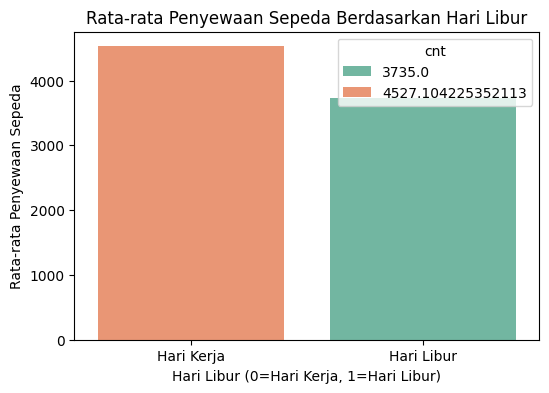

In [150]:
plt.figure(figsize=(6, 4))
sns.barplot(x='holiday', y='cnt', data=avg_rentals_holiday, hue='cnt', palette='Set2')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari Libur')
plt.xlabel('Hari Libur (0=Hari Kerja, 1=Hari Libur)')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(ticks=[0, 1], labels=['Hari Kerja', 'Hari Libur'])
plt.show()

### 2. Rata-rata Penyewaan Berdasarkan Musim

Rata-rata penyewaan sepeda berdasarkan musim.

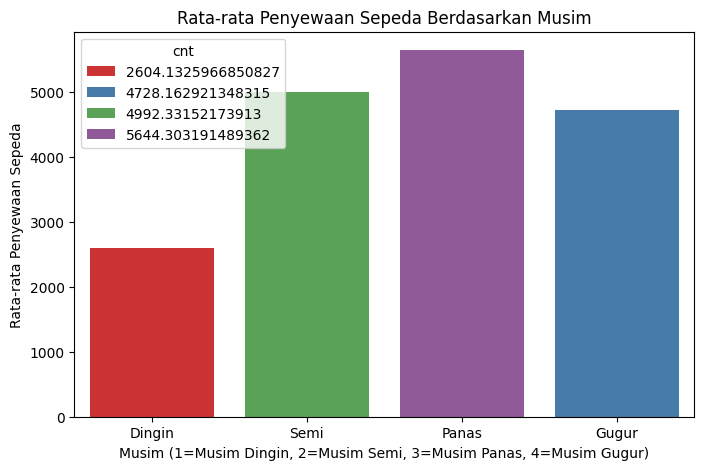

In [151]:
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='cnt', data=avg_rentals_season, hue='cnt', palette='Set1')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim (1=Musim Dingin, 2=Musim Semi, 3=Musim Panas, 4=Musim Gugur)')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Dingin', 'Semi', 'Panas', 'Gugur'])
plt.show()

### 3. Pengaruh Hari Kerja terhadap Penyewaan

Grafik ini menunjukkan rata-rata penyewaan sepeda pada hari kerja dibandingkan dengan hari non-kerja

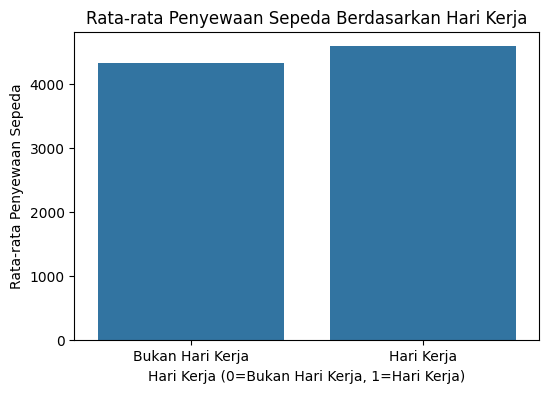

In [152]:
plt.figure(figsize=(6, 4))
sns.barplot(x='workingday', y='cnt', data=avg_rentals_workingday)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja (0=Bukan Hari Kerja, 1=Hari Kerja)')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(ticks=[0, 1], labels=['Bukan Hari Kerja', 'Hari Kerja'])
plt.show()

### 4. Penyewaan Sepeda Berdasarkan Jam dalam Sehari

Grafik ini memperlihatkan jumlah penyewaan sepeda berdasarkan jam dalam sehari.

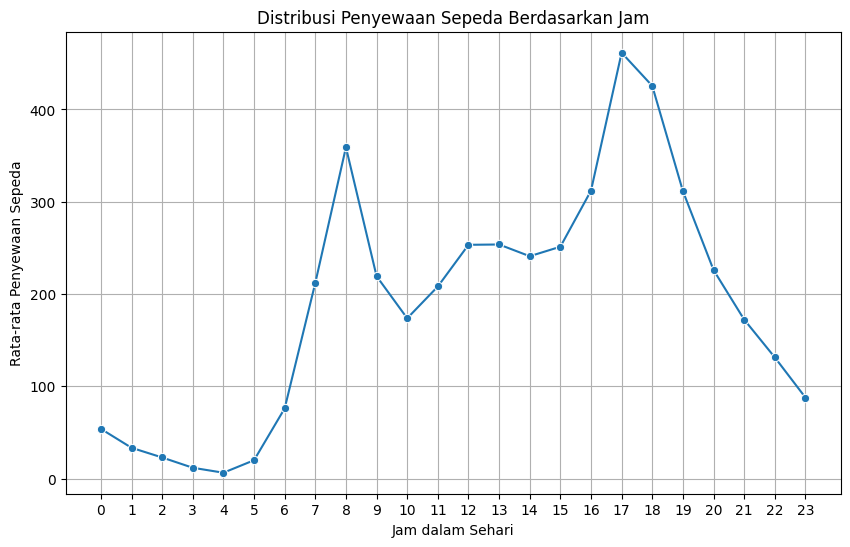

In [153]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=avg_rentals_hour, marker='o')
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.grid()
plt.xticks(range(0, 24))
plt.show()

### 5. Hubungan antara Suhu dan Penyewaan Sepeda

Grafik ini menunjukkan hubungan antara suhu dan jumlah penyewaan sepeda per jam. 

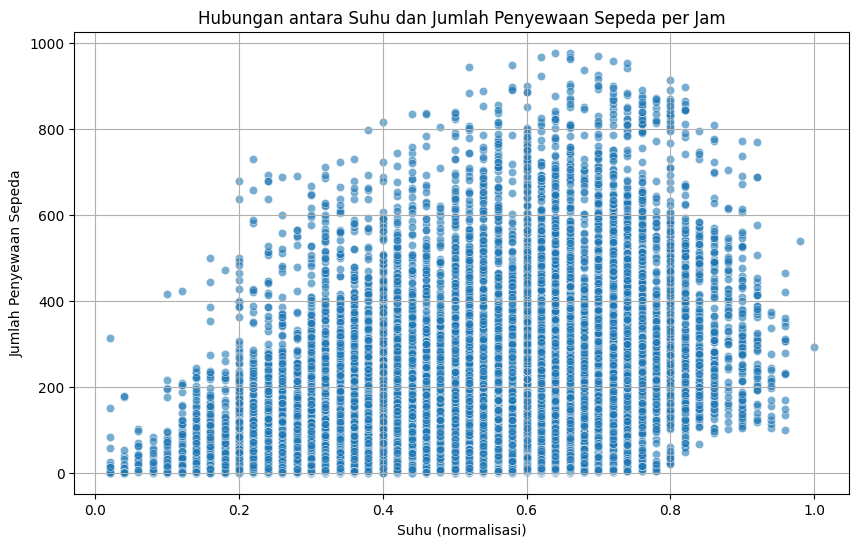

In [154]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=hour_data, alpha=0.6)
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Suhu (normalisasi)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid()
plt.show()

### 6. Hubungan antara Kelembapan dan Penyewaan Sepeda

Hubungan antara kelembapan dan jumlah penyewaan sepeda

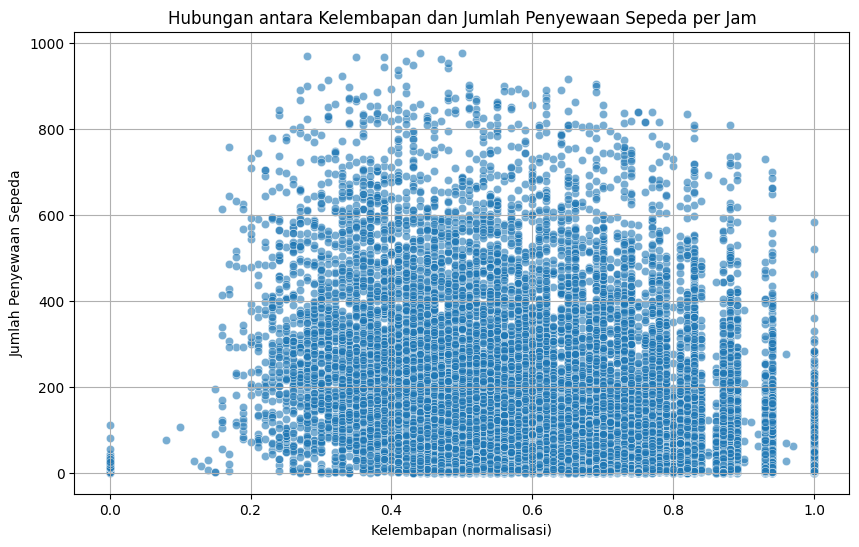

In [155]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=hour_data, alpha=0.6)
plt.title('Hubungan antara Kelembapan dan Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Kelembapan (normalisasi)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid()
plt.show()

### 7. Kombinasi Analisis Suhu dan Kelembapan

Heatmap menunjukkan kombinasi antara suhu dan kelembapan terhadap jumlah penyewaan sepeda. 

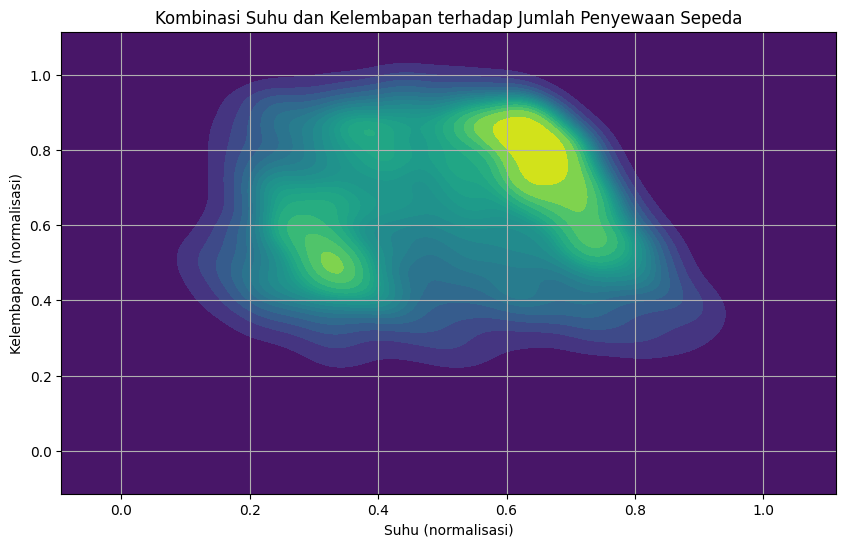

In [156]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='temp', y='hum', data=hour_data, fill=True, cmap='viridis', thresh=0, levels=20)
plt.title('Kombinasi Suhu dan Kelembapan terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu (normalisasi)')
plt.ylabel('Kelembapan (normalisasi)')
plt.grid()
plt.show()

# Conclusion

### Bagaimana Pengaruh Cuaca terhadap Total Jumlah Penyewaan Sepeda pada Level Harian?

Dari analisis yang dilakukan, dapat dilihat bahwa kondisi cuaca yang berbeda memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Rata-rata penyewaan sepeda tertinggi terjadi pada kondisi cuaca cerah (weathersit = 1), diikuti oleh cuaca berawan (weathersit = 2). Sebaliknya, penyewaan sepeda menurun drastis saat cuaca hujan (weathersit = 3) dan badai (weathersit = 4). Ini menunjukkan bahwa cuaca yang lebih baik cenderung meningkatkan minat orang untuk menyewa sepeda.

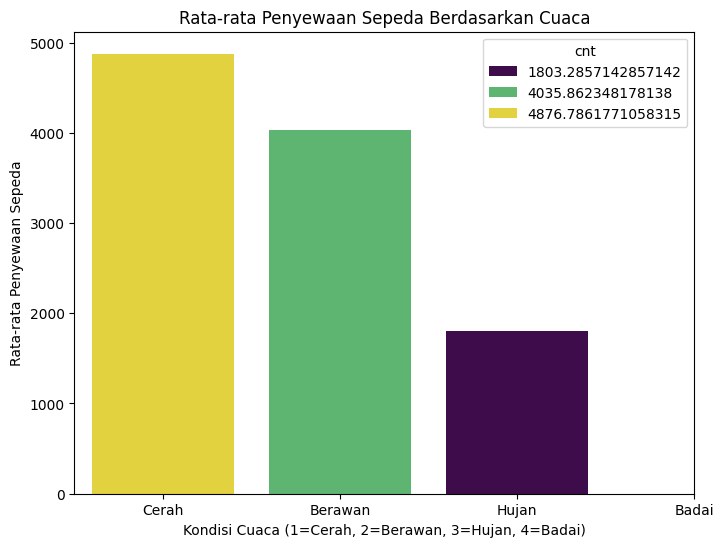

In [157]:
plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt', data=avg_rentals_weather, hue='cnt', palette='viridis')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca (1=Cerah, 2=Berawan, 3=Hujan, 4=Badai)')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Berawan', 'Hujan', 'Badai'])
plt.show()

### Apakah Ada Pola Musiman dalam Penyewaan Sepeda? Apakah Ada Bulan-Bulan Tertentu di Mana Penggunaan Sepeda Lebih Tinggi?

Analisis musiman menunjukkan bahwa terdapat pola yang jelas dalam penyewaan sepeda berdasarkan musim. Musim panas (season = 3) memiliki rata-rata penyewaan tertinggi, diikuti oleh musim semi (season = 2). Musim dingin (season = 1) dan musim gugur (season = 4) cenderung memiliki penyewaan yang lebih rendah. Selain itu, berdasarkan data bulan, bulan-bulan dengan cuaca yang lebih hangat umumnya menunjukkan penggunaan sepeda yang lebih tinggi, terutama dari bulan April hingga September.

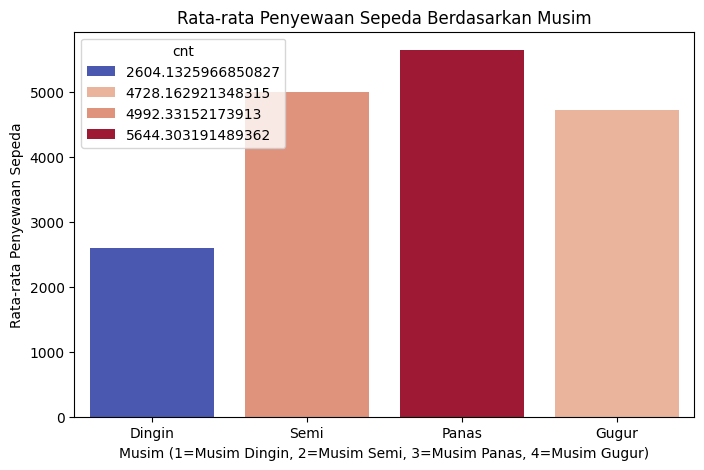

In [158]:
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='cnt', data=avg_rentals_season, hue='cnt', palette='coolwarm')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim (1=Musim Dingin, 2=Musim Semi, 3=Musim Panas, 4=Musim Gugur)')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Dingin', 'Semi', 'Panas', 'Gugur'])
plt.show()

### Ringkasan

- Pengaruh Cuaca: Cuaca cerah meningkatkan jumlah penyewaan sepeda, sedangkan hujan dan badai menyebabkan penurunan yang signifikan.

- Pola Musim: Musim panas adalah periode penyewaan tertinggi, dan ada bulan tertentu dengan penyewaan lebih banyak, yang umumnya bertepatan dengan cuaca yang lebih baik.

## Export Dataset

In [159]:
day_data.to_csv('day_clean.csv', index=False)

In [160]:
hour_data.to_csv('hour_clean.csv', index=False)